In [3]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline
import csv
import sys
import random
import random
import numpy as np

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

from sklearn import datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

# svm

In [18]:
x_dataset=[]
y_dataset=[]

In [19]:
def readDataset(file): 
    
    pcount=0
    ncount=0
    
    with open('1.csv', 'r') as f:
        reader = csv.reader(f) 
        for row in reader:
            
            if "?" in row:
                continue          

            
            xtemp = list(map(float, row[1:len(row)-1]))
#             ytemp = list(map(float, row[-1]))
            x_dataset.append(xtemp)
            
            if row[-1]=="2":
                y_dataset.append(1)
                pcount=pcount+1
            else:
                y_dataset.append(-1)
                ncount=ncount+1
        
    print("pcount ",pcount)
    print("ncount ",ncount)
        

In [20]:
DataSet=readDataset("1.csv")

x_dataset_train=x_dataset[0:400]
y_dataset_train=y_dataset[0:400]



x_dataset_test=x_dataset[400:]
y_dataset_test=y_dataset[400:]

pcount  444
ncount  239


In [21]:
X = np.array(x_dataset_train,dtype=float)
Y = np.array(y_dataset_train,dtype=float)



X1 = np.array(x_dataset_test,dtype=float)
Y1 = np.array(y_dataset_test,dtype=float)

In [42]:
def svm_sgd_plot(X, Y):
    
    w=np.zeros(len(X[0]), dtype = float) 
    

    eta = 1
  
    epochs = 10000
   
    errors = []
    
    epoch_l=[]
    
#         training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):  

            temp = (Y[i]*np.dot(X[i], w))       

    #         print(temp)

    #         print(X[i].shape,Y[i].shape)
            if temp <1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = error + 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        epoch_l.append(epoch)
       
      
    objects = epoch_l
    y_pos = np.arange(len(objects))
    performance = errors

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('error')
    plt.title('epoch')

    plt.show()
    
    return w 

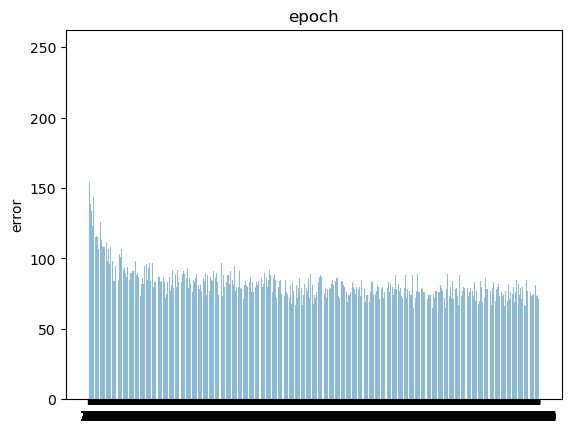

In [23]:
w=svm_sgd_plot(X,Y)

In [28]:
def predict_system_noraml(X,Y,w):
    
    predicted = []
    
    for i, x in enumerate(X):  
    
        temp = (Y[i]*np.dot(X[i], w)) 
        
        if (temp >= 1):
            predicted.append(1)
        else:
            predicted.append(-1)

    return predicted

In [32]:
def check_correctnes(original,predicted):
    correct = 0
    for i in range(len(original)):
        if original[i] == predicted[i]:
            correct += 1
    return correct / float(len(original)) * 100.0

In [30]:
predicted=predict_system_noraml(X1,Y1,w)

In [31]:
status=check_correctnes(Y1,predicted)

# accuracy svm

In [32]:
print(status)

50.53003533568905


# kernel svm

In [4]:
X, Y = make_circles(n_samples = 200, noise = 0.02) 



for i,y in enumerate(Y):
    
    if y==0:
        Y[i]=-1

In [5]:
Y

array([-1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [22]:
def kfunction(x,y):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (1 ** 2)))

In [23]:
def kervel_svm(X, Y):
    
    alpha=np.zeros(len(X), dtype = float) 
#     print(a)

    #how many iterations to train for
    epochs = 100

    
    for epoch in range(1,epochs):
        
        for i, x in enumerate(X):
#             print()
            temp=0
            for j,x in enumerate(X):                                                 
                
                pv=kfunction(X[i],X[j]) 
                
                temp=temp+(alpha[j]*Y[j]*pv)
                
            
            o_temp=Y[i]*(1/epoch)*temp
            
            print(o_temp)
            
            if(o_temp<1):
                alpha[i]=alpha[i]+1
            else:
                alpha[i]=alpha[i]
                   
    return alpha   
        

        
    
    
    
    

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [25]:
len(X_train)

134

In [26]:
alpha=kervel_svm(X_train,y_train)

-0.0
0.14590240257802917
0.9059299252911326
-1.6216700352607094
1.1081611682898205
-1.6019923845235025
0.18905425476355686
1.1814151644549116
-0.9750743819114517
-0.08465215270997806
-0.22817218849762572
0.5247360403575828
1.444427082218903
-1.179191969726251
-1.3343627261562452
0.3468926702960119
-0.7694713815555939
-0.6827477510835358
0.09825838594207642
-0.9346430150555131
0.46078714198471965
-0.8298145751376063
0.07744539836200565
0.817262266119783
1.6510291482697221
-0.43341230431662586
0.3546308310667644
-0.9452900236710905
1.0527167291759667
-0.30791693832930894
-0.35086680992379127
-1.382073104477143
-0.3815740743976158
0.6391092546219866
-0.6278373702504534
-0.5338202133429877
1.2432720578801022
-0.6428946626537421
0.48269048629210276
0.9503584999815134
-0.3674213968408541
0.5383369076093523
-0.37597860426715674
-0.9714461702680808
-0.4785181276583348
-0.004595502814623786
-0.1024817502943092
-2.729844858803247
-0.17641130346325123
-0.8301858455553919
0.704965003616499
0.33742

0.6770527037857612
0.43353302697994545
0.6352022200365366
-0.18186958321087873
0.6686412836037874
-0.1304871475216618
0.9438389796072755
0.6663115749298947
-0.16919439086813187
0.05126261548202468
1.4025577506424571
-0.6056464845173737
0.8096571743548309
0.2908089766794497
0.9787381700321593
1.2470968685345227
-0.13103765893994201
0.20231363666374758
-0.41797232116081084
0.06897423769323302
0.6721467497935921
0.4807379964595447
0.40699023951469326
-0.21254217627361827
0.6527016566903433
-0.18077276462417624
0.15807536433991431
0.3731770562135598
0.10966413169604683
-0.08584181330776172
0.33544941250550275
0.6078696601068615
0.8283013783566845
0.9039487072405107
-0.1728656949904811
0.059229681619121954
0.2227447109115216
0.8354870417534339
0.504469526038769
-0.35450097856538454
0.4942884122630915
0.5560577247990048
-0.25969978433785956
0.6909986461242499
-0.3955113871027667
-0.021213399793222676
0.7732498070143579
1.0332016260182506
1.2893541578325396
-0.41436939910749504
0.750885056948

0.852089469820632
0.8190100293936271
0.8449519418163334
-0.11948338089453758
-0.08814413439856991
0.744104659003918
-0.13778473512826467
-0.3583978606497064
-0.2023746332911454
0.7760702454687926
-0.07968085571202793
0.6678132303570774
-0.06685735619121635
0.06542868951633818
0.20406097878165985
1.0557820121930446
0.8758333259124893
0.5770807641336909
0.8330139343630885
0.09060038339091236
0.6749066479924694
-0.284079446507243
0.32011307774364717
0.16045832088506518
0.6256726476370005
0.5529681639871185
1.0248068579761922
-0.23213218144448428
-0.07915411741653372
0.16067963489671366
0.4913541689265307
0.24055983001292403
0.6065409506186528
0.07150311965343503
0.7041479821241837
0.34345723742874035
-0.2569981984583226
0.2862876177871956
0.2425496035470116
0.45308422078403043
-0.0362243552606748
0.2874245382635633
0.02567540999399731
0.2684389210752405
0.20775668817318899
0.4662460862795685
0.3047758249366553
0.41753527098673904
0.3973846967847844
0.4457759185846197
0.545016651589992
0.4

0.0988038892633685
1.002204446096571
0.7689432739114056
-0.0069896492197029595
0.4431127702472608
0.09940784727532062
0.14960996126671625
0.6602566081803382
0.25262849333467935
-0.0844441385498658
0.1721862773304317
0.58704312253761
0.17427769899506065
0.26985605097864246
0.6390282851435656
0.21285412676819845
0.5563582614395707
0.8285277952837254
0.7867010036484817
0.9493009597309646
0.7371594430166927
0.14641625073481998
0.1892895538283794
0.34643640874377063
1.0534160512207498
0.5538249128859568
-0.03891321453913496
0.532129821275371
0.4483198064542243
0.03748233844265673
0.5936755722732239
-0.1426107348456677
0.25515336690610724
0.7871475369217662
0.8701300171918585
0.9866230310202688
-0.26428364038143654
0.8309976490311162
0.973318694815703
1.0176695724897726
0.20457164083455054
-0.23062251286421231
0.1689824207879354
0.23241344411102163
0.616255444706796
-0.10686593844382948
0.7109589925731422
0.07985321194514375
0.07840908676526004
0.885386911301965
0.9300867311014042
0.95620450

0.1109024455488352
0.716267424077034
0.25510617511938743
-0.12237020785098028
0.12686569067289616
0.6585977551549005
0.1260819826470789
0.19307440879584417
0.7660823994432403
0.12981994555896392
0.6263291962814177
0.904077657196606
0.8634430264421625
0.9876084023113477
0.8009128758141384
0.09849805682754026
0.18993892027666764
0.28131104270609986
1.0660499798090195
0.6128960180018874
-0.09508152788827609
0.6568236705283859
0.5401621444774058
-0.020531583434085475
0.6971878490041646
-0.11817921929852523
0.18572409104885518
0.8011807905452927
0.9432845978768183
0.992429553035881
-0.22076693102973066
0.8177835947411043
0.9391906506548294
0.9661103199976369
0.12728250054673432
-0.24419384393901156
0.11868382867953775
0.1566900096676057
0.7511431042595974
-0.12081089996305039
0.8323795456546329
0.05864537462540148
0.0364319705283222
0.9653770740425037
1.0182328900480924
1.0142651553664266
0.8650044113418942
0.8255378736935355
0.10371888151564057
0.05892283812023888
0.82525774591214
-0.02770

-0.13418066177315943
-0.16373552553094853
0.8540985470146327
-0.052106811449073615
0.7373632462483721
0.05989272458140604
0.08445009646886249
0.12989682316446055
1.0720857251878495
0.8646308525361055
0.7924229976010407
0.7387869304062207
0.1527885476516308
0.7321656451851893
-0.1791384465063405
0.2921856280378475
0.1321691351411724
0.7991550876283787
0.7339724588683051
0.8784224841895849
-0.041392521953482586
0.014511831028944978
0.07426274206309229
0.7031223110664555
0.1613690737754154
0.7486282812309301
0.0241535288875742
0.7927362047967851
0.25521622810794264
-0.24281552916228777
0.5994202617065862
0.18891313365551202
0.7123911762971026
0.030333861894159927
0.14620308299030033
0.02244397925235087
0.21897365231997504
0.5060337686700167
0.27225767219056995
0.15727200715975426
0.7419585708539227
0.23867191591559325
0.20719223831800287
0.2682257671220284
0.8373041986208685
0.43907284638295047
0.7177292964810712
0.34595715635746566
0.5718168431165567
0.141742411981301
0.15928922047540234

0.6810783886379131
0.4957461500844685
0.5576820934554945
0.5385688834955797
0.6729898316053308
-0.2055297148946052
0.7589141582714404
0.7121418346289213
0.4920415644241339
0.2593242279088165
0.8001029379691096
0.7056404028075902
0.6419986836086488
-0.10693530238986132
0.7215928382932624
-0.13960901062317108
0.9921758149162279
0.7806288094989824
0.057374561802364346
0.07222892066914656
0.9868862496911674
-0.07049484420436579
0.744529457039065
0.1247159344698927
1.0279173957405932
0.8000891461772915
0.0021737388438820963
0.5033977205833952
0.152097042771311
0.12113753368212783
0.7152652835276039
0.27468874126644904
-0.13256156906199046
0.19090395179260142
0.6524309654791041
0.18145116012925866
0.2264384162473302
0.7891778194727259
0.16324837628357677
0.659914651631059
0.9332767262751345
0.8762180207119571
0.9791370702867443
0.7654458286511474
0.1424750767768666
0.21448249687901233
0.2919520765470603
1.0448744816886917
0.6284136669436702
-0.047367055547179925
0.6550633522250829
0.53336711

0.6186366549361713
0.2374029159837112
0.6986506297713894
0.055060900778744974
0.1822507126047109
0.016248727545473993
0.201618461622543
0.5189474937566848
0.298745701113267
0.12966139721498904
0.783419327803286
0.2402186339679564
0.19347382959504314
0.2536462232340997
0.8902615170936665
0.44126630096972264
0.7649219020700885
0.32408716175747665
0.6229664261969688
0.12303346149437283
0.12817475028683906
0.3472739864823755
0.3633534540084066
0.7104212529252908
0.5379424155948079
0.5829637068706329
0.5659419119931758
0.6925509647563659
-0.21217825063261006
0.777087862191417
0.7275692888723406
0.5112016502571995
0.2481467953268681
0.8043039765095296
0.7254974083744419
0.6541159064222548
-0.10917671855325443
0.7198064697316634
-0.14220391564343957
0.9919935667439254
0.7852056195132465
0.06417369126823898
0.07183674108540401
0.9779165900121015
-0.04145688752936941
0.7477897514010365
0.1210068639792878
1.0228155797345029
0.7896519192299096
0.0007932959330617406
0.5143189973564047
0.1730436063

0.7304337061466829
0.26917525535388487
-0.15794715120216452
0.20586668964436944
0.6683391436558437
0.18979665172492197
0.24545310081130514
0.7940926503765047
0.17510575954276816
0.6972786585734732
0.9617906299452387
0.8784045486439607
0.97966403092678
0.7376480734935933
0.1445351628443247
0.21744478903103692
0.2778929292882443
1.050273633172618
0.6509983531075438
-0.015657005283583204
0.6698599595456661
0.5517619486236864
0.005840024830993566
0.6937380488228568
-0.06413107874619542
0.2404090350880587
0.7928107280461412
0.94884812053332
0.9297295773142705
-0.1354922586059707
0.7730658960899839
0.8618392496943562
0.865389979573343
0.19439827059530496
-0.13821154129510935
0.1758118309590642
0.22184346135441482
0.7841323515173569
-0.04866937324245012
0.8273808000908178
0.16224998080267874
0.11030453222818523
0.956867042115465
0.9744632751218003
1.0031669888495185
0.8604043934085918
0.7907434383878349
0.16979006162404617
0.16456501050895875
0.8560929012873968
0.044142003744564735
-0.1081981

0.9622030625824816
0.9754719298719934
1.0120300510022504
0.8703105278459291
0.7978203443346592
0.17677673417791706
0.16543538511122022
0.8698870921563713
0.041214067947529465
-0.10130212473842631
-0.13398320457944096
0.8714303691061781
-0.02007695724516842
0.7383788436863259
0.08748835066189098
0.1143917508021889
0.12992273467987095
1.1031871449161004
0.8935974801092705
0.8354170984470819
0.7373065414699187
0.18264449376328032
0.7459458905884141
-0.13186554980960216
0.30914447512022697
0.14803058995750207
0.8354110562811781
0.764628286611698
0.8642333748635822
0.022122568848739303
0.052728529724628714
0.07868612796062108
0.7291731236817488
0.1677589571603267
0.759553502705467
0.0495490256667481
0.7945185636573703
0.2644038552946068
-0.22243316079657177
0.66278537318884
0.20892267493116007
0.7529501637823419
0.06264923430346069
0.14112420131270328
0.020022991226026264
0.20047964828549888
0.5653074903279511
0.25030081230640666
0.11448562343766167
0.8189502124458091
0.22557155530136702
0.

1.011204867808561
0.8685015117156423
0.7924740068244858
0.1902061456863493
0.17481493091609218
0.8649965990108835
0.051543952279771155
-0.09566710854486872
-0.13242252771073176
0.8762594887694699
-0.01407654719322459
0.7398062236616978
0.09651229577103623
0.11928176129393597
0.13276458754822332
1.1086751138532995
0.897655942177361
0.8384008828721109
0.7343097063929988
0.19318711104308797
0.7415297678247373
-0.12835973052527777
0.3178713763419277
0.14931235058632247
0.8336672407334748
0.7651013248827627
0.862955774957353
0.0338174649511728
0.06230992156270338
0.08105449155548909
0.7263754618174303
0.17161729108387463
0.7544306059640974
0.05903449637006917
0.7886556855482317
0.2703416442252291
-0.223043607050483
0.668982978975892
0.21817833346035664
0.7525722612510375
0.0718970375389753
0.1460190759766389
0.018698975475491948
0.19962370560389572
0.5702923656394523
0.25335348424220483
0.10610940245569685
0.8320273201545163
0.223927175246774
0.1624109595685443
0.20560748283663305
0.9428144

0.7977918277775808
0.591022618531721
0.19576414674765297
0.849704938456956
0.7987163295242239
0.7143965771772715
-0.1042770913231327
0.7299487279832945
-0.14323609743880752
1.0009960103946434
0.7960200886688701
0.067393647074751
0.06018180690885468
0.9875985845085059
0.0015982741550914516
0.7844336024485208
0.10740436328756396
0.9974242100952893
0.8113579573136789
0.004845350565441152
0.561240133683341
0.17516817147228975
0.12020180947172382
0.759334348629881
0.24640931468231375
-0.19335928760108023
0.2064168865824425
0.6938765280212525
0.1870343738815254
0.2346870469302327
0.8307309327728397
0.16317563853113592
0.7455361951294459
1.0050605527449956
0.8892633916993197
0.9813435481706645
0.7357034096467654
0.14274538317406968
0.20884916697250178
0.2633144529884603
1.0515104101917605
0.6779797335866523
-0.010257932346015144
0.6904732931284262
0.5704486043527547
-0.0014235048390888805
0.7094066943735657
-0.049710257713574894
0.23937898359241414
0.7955757398653813
0.9665461440126117
0.9174

0.9875016791908877
0.004004471215531661
0.7837358954906801
0.11398243235033567
1.0020225293765546
0.7976555885061147
0.023684379780432845
0.5510866314900271
0.18980643609654566
0.1375587363002383
0.7498252411046404
0.26091496837084577
-0.17959442993160163
0.22103601659938857
0.6846045454747957
0.20029902002228586
0.2495602181137487
0.8174801261305294
0.17712568151237096
0.7341184347458046
0.9907244776902138
0.8942723615525178
0.9866739870146543
0.7306943013044747
0.14933304585503132
0.21134231834123357
0.26614306274716976
1.056186868186291
0.6797693735165505
-0.0028849652125014953
0.6877383515127984
0.567806876121413
0.0037260844034351396
0.7054498499192879
-0.05329589419408437
0.2468735023652234
0.8008118198775397
0.9641567458727303
0.9186581896449207
-0.11406754301982355
0.7731648516499358
0.8460561829898751
0.8477075636158751
0.20544956108644483
-0.11100288402012111
0.18461128197473126
0.23136841038054828
0.8081849623125288
-0.030163807121020278
0.8395176973015804
0.1831120328225782

0.9705291901507086
1.0065051394950557
0.8669331355162757
0.7848697832003374
0.2084777148499967
0.1985311358052043
0.8628888402416084
0.06676680156472689
-0.08257537763100338
-0.1184634487420285
0.8731159754856055
-0.0072019570541971235
0.7363545997656177
0.10585401735793845
0.12536885205685863
0.13264157249939623
1.1086726583822095
0.8986227888454092
0.8499558717169213
0.7301846535270698
0.20479323496251062
0.7416169706665373
-0.10840195232690888
0.32766493551139647
0.15455690146745032
0.8387189675041143
0.7719981551650923
0.8517598520362433
0.053310158902923
0.07445124831971497
0.08039493790984108
0.7283275986520222
0.17359648506738395
0.7529813179237878
0.07119745456002434
0.7856310959209556
0.2765663485793621
-0.207089569658801
0.686770665166821
0.2286080879983271
0.7588105545764506
0.08243349649812025
0.1494933455233621
0.024905703871398188
0.1980082448030157
0.586213170005176
0.25261492149643117
0.10380291066987479
0.8434049257691482
0.21920026274269955
0.14987436480683353
0.18933

0.07208704525949293
0.13183402514882592
0.02470145292486424
0.19172803102756147
0.6040180919325301
0.23338151299250984
0.10421735902842308
0.8468542810639794
0.20981239537368582
0.13769547309440164
0.17282678000879423
0.963481274501755
0.34231200509688037
0.8264314439521019
0.2138609155329122
0.7356500237542087
0.09144735187456612
0.10210976394272897
0.2252390853709021
0.25950699379534253
0.7747806486707633
0.715157764485295
0.667609814990779
0.6962814381505283
0.7976116352096195
-0.20592603471611096
0.8340012066001594
0.8255527195918778
0.6186326311740497
0.18244986082854606
0.8677380370923428
0.8192925843763765
0.7312497517037556
-0.08915457646007809
0.7338487404174129
-0.12587581178952856
1.0022680123858405
0.7891543671120358
0.08067307782821191
0.06716613740600376
0.9979230114775913
0.00661569854043804
0.7978463471586404
0.11419637830508517
1.0003437178901315
0.8072905978119824
0.029679716840887112
0.5603383582166689
0.18651785384384093
0.1405789043248304
0.7604442161309887
0.26150

0.262214003317642
0.7706748769298615
0.7141516857759289
0.6656656032039427
0.6936661827290045
0.794040959937443
-0.198817162817103
0.8302865534520716
0.8210669474954103
0.6148863876496444
0.1847265192209337
0.8618649788026537
0.81712787245011
0.7276195168244619
-0.0816796318745607
0.7279077758655539
-0.11835799330906961
0.9959954783445262
0.7914316609542744
0.08095468118830716
0.06642286507353683
1.0005709112628436
0.017933071277565677
0.7852266937798976
0.11700570068532559
1.0016538357034028
0.7906746347307799
0.025451886502604243
0.5566214626498228
0.20480196881396
0.13549144552581097
0.7520849006350826
0.2637712308522741
-0.1826918546822098
0.23361656350167118
0.6850936512669511
0.21133423718455377
0.2526852768536677
0.8277375667864513
0.1809748117177786
0.7431750657438451
0.9993426355627154
0.9013389677692707
0.9877579604372556
0.7279816630028683
0.1580165758364019
0.21390495645803545
0.267324156979351
1.053098055759457
0.6860685740693713
0.002926623771259323
0.6901359538551557
0.5

0.06420642559026556
0.9930146954847513
0.01354543511168238
0.7974748471619955
0.11221264152513519
0.9994696546314129
0.808927132478125
0.018156176544285904
0.5724122581391755
0.1906079125296402
0.12519165063583768
0.7687518424760901
0.2546995388201951
-0.18993671839170997
0.21762430684941889
0.702149197893569
0.19566384751310864
0.23459111311987854
0.8476619129984863
0.16255909422382947
0.7551977702215972
1.0090838215094136
0.8998951894693155
0.9806317907410184
0.7365353549560771
0.1463706154433466
0.20676893255323345
0.2557202267874765
1.045369096133136
0.6953803917101405
-0.007596600344860605
0.705318818797423
0.5813071235970076
-0.002487825404641697
0.718598386600634
-0.031131063636035232
0.2418045717442201
0.7904243071173108
0.9764147822845309
0.9062331586666668
-0.08747356566258538
0.765955937337038
0.8233339059484891
0.8342112342726914
0.20352226189793066
-0.09760049911810341
0.1849019967323253
0.22513031717197396
0.8253806204713433
-0.007447293644579133
0.854357668810014
0.19526

0.25180536879226056
0.7726815551745213
0.7289153860673708
0.6807160283271416
0.7056756407288369
0.8043464807205154
-0.19239960279560725
0.8404788635569673
0.8294429322709782
0.623515598480732
0.1730517669401357
0.8676396968664727
0.8311445734441254
0.7375530483553108
-0.07334793967675937
0.7313309178579721
-0.11170895133515613
0.9979343229366324
0.7955934810845896
0.07483383926174567
0.058127368659916356
1.0015481844774103
0.01895537664738456
0.7927691227382087
0.11003483197465391
1.003315427676015
0.7926200673034578
0.029229389273033868
0.5706349848121102
0.2069160401298651
0.1355250645585434
0.7632209158785014
0.25833647670335913
-0.18384616131357903
0.23532204421822367
0.692959203359085
0.21221302771673778
0.24928366336565388
0.8361627546738496
0.1782145722579459
0.7515092443479539
1.000631496913908
0.8902763985087399
0.9706227604797535
0.722626133147133
0.16042917065029927
0.20858328893477773
0.26515152955529364
1.0373578148182026
0.6934577377788746
0.007014808242642778
0.690363949

0.749431251694349
0.16192382614194087
0.7736637145489202
0.06341857712835128
0.80523889837057
0.2669460221640462
-0.18021765920523478
0.7144896348338513
0.21740610577123723
0.7821993544518724
0.07045871514882511
0.1358365039226697
0.030958331786162977
0.1861218724451123
0.6134283807171361
0.23452560826746177
0.11122510191927547
0.841667283853403
0.20902728581012073
0.1311804630480279
0.1625980371663068
0.9638750955533517
0.3371925721768766
0.8359066537711489
0.20224643726736016
0.7502504346809448
0.07969175441506676
0.09901820927030185
0.21017063602338323
0.2416455599458945
0.7693272212765259
0.7379363040160918
0.6754815615209105
0.7154714699395686
0.8137502921378046
-0.18578646866984433
0.833738868090669
0.8369661156060718
0.6262622455350505
0.17523744889721424
0.8744822397838319
0.829906979290176
0.7366567859612638
-0.06944573005939692
0.7388260841495834
-0.1034946922230118
1.0039814881630822
0.7801579930500412
0.08923447365192458
0.07151171049977209
0.9955078784700554
0.012079955257

-0.10291234690554685
0.8653013956037937
-0.022333049625327218
0.7392798362493008
0.09635330156596425
0.11093070230129938
0.11137418415052866
1.1033915104325565
0.8984705525292938
0.8840907436682317
0.7364344124623889
0.19468884632142391
0.7633668629813177
-0.08340098283160893
0.3163620622355959
0.14858535222041952
0.8665599216520662
0.8012181809549679
0.8377417971298874
0.060842249262003816
0.07036255513530304
0.05775881898032217
0.752811821627673
0.1547412771639291
0.7741140341924272
0.06231558981460959
0.8038729518020444
0.2630632740626532
-0.1770901138194294
0.7269308430549233
0.21754880823159783
0.7873369203014617
0.07532313727110036
0.13251570651848166
0.03600558231548619
0.19052839281961043
0.6245205075175388
0.23126581496861312
0.11363402036006241
0.8453879241274529
0.19734083198372962
0.11821218586129015
0.15171359269627538
0.9657561588555731
0.33185582409011666
0.8349032181070513
0.19267108027788737
0.7654269316096516
0.08244908807817779
0.10251977224242337
0.1992723699605263


0.19238918340072103
0.7646457554051826
0.07906527964723062
0.09892005352258956
0.19867216799244422
0.23562329264016507
0.7747655206242077
0.7503140459339267
0.6873669401860508
0.7237305999963024
0.8199505586715314
-0.1846489673740837
0.8425303869766307
0.8424193323458967
0.6338968628656363
0.1669785941295771
0.877027658465971
0.8403801022823529
0.7442733883648767
-0.06597813890354663
0.7378972170138411
-0.10208269686627093
1.0028008178033634
0.7852918725682844
0.08473488094037755
0.06515689341945284
0.9963071369730979
0.016703369955516648
0.8041148907788258
0.11447901158621715
1.0024018752588064
0.8018552004573741
0.03697327394679751
0.5754993344382984
0.20259384415345033
0.13889114450457093
0.7710449753096296
0.26373693479595667
-0.1783663865837087
0.22860674436712725
0.7027559353412224
0.2049578607253107
0.24122277975420112
0.8466095213239091
0.16877140806351904
0.752066834094378
0.9982208344451514
0.9042397217026551
0.9799575059357604
0.735510365554518
0.14973069876391112
0.20137776

0.2555078530665534
1.0358715624652974
0.7030882818647597
-0.004384188290356405
0.7085345553856115
0.582299510074705
0.0016816095225989259
0.7182372673208457
-0.01419393411065284
0.24804954418027805
0.7814428298829221
0.9778093288498507
0.8954914182905466
-0.0672366722129667
0.758405638509753
0.8052324994052711
0.8215165488835517
0.2122975621470065
-0.08599575739144111
0.19151180739161305
0.2273409964763387
0.8299946088143204
0.009975037273173264
0.8600029190899385
0.2066445545588018
0.13867047745771552
0.9518759216611117
0.9776342145417131
0.9973263690445264
0.8818132910818391
0.7940440901115116
0.21071435668176622
0.2224693394295904
0.8828484283796844
0.06487958872983114
-0.07168545417746625
-0.09644649590257756
0.8613254426604738
-0.019102542541001907
0.7352791809728503
0.09709725600637835
0.11440085556261906
0.11257952466220587
1.1019622731941068
0.8981016232021666
0.8849568415391509
0.736211313452736
0.19644284209657453
0.7640466433664397
-0.07562822566096863
0.3184562416174666
0.1

0.06811570809836982
0.07586152436586172
0.06216421342593578
0.7458925570525322
0.16067109593939186
0.7675110305998099
0.07382857857957578
0.7982705782807937
0.2719618205843529
-0.16741896981955984
0.7272586781800354
0.2278244039699825
0.7817301005269904
0.08068227947120071
0.14109928339371766
0.03979319786484515
0.19063009897266697
0.6239959561931444
0.23852613622595054
0.11592595307905468
0.8437223399862928
0.200572303890058
0.11881226351635385
0.151356140811814
0.9665037219158155
0.3355041027317578
0.8375092986270964
0.1918797376543934
0.7692613920962011
0.081556672294397
0.10201073547067609
0.1964903400049863
0.23684613686431416
0.7719282054573605
0.7510977420327418
0.6899284815488466
0.7227699600319154
0.8178989301412042
-0.1769878093452023
0.842290866931158
0.8387369857728919
0.630835050038637
0.1665323434983565
0.8716244367536659
0.8413888921758246
0.7424629100317206
-0.05747543568091086
0.7332380904423209
-0.09402924762210663
0.9976180202060257
0.7872817753727424
0.0838617576856

0.8394036718573691
0.012630909012089854
0.8646027021360687
0.2000774066251138
0.13113886356715246
0.9537241612439281
0.9799262575587958
1.0060862266584545
0.8804458350498335
0.7918161928009074
0.21471761946139217
0.23045879722774562
0.8847800174204303
0.06735368015018196
-0.0654842925435528
-0.08911183239436488
0.8556501605849842
-0.01791577284328198
0.7311210729191964
0.09913795833886185
0.11621561705006883
0.11126313901481338
1.0968334219258518
0.8938426941244105
0.8881759757267185
0.7329055956929069
0.19712368341388148
0.7651057849780777
-0.06657223825102368
0.3177462809704534
0.15628766115710768
0.8708994050910129
0.8043242489562138
0.8274872945992101
0.069992418072144
0.0751736627292903
0.05881359223834227
0.7558377023618147
0.15532154236886264
0.775623997277628
0.06500175508491994
0.8040906385679012
0.2639956973944611
-0.16186937921709582
0.7331732806991109
0.21921144019835684
0.791897541901634
0.07901712384882749
0.1317641911605427
0.04382258786547645
0.1921248646979074
0.630881

0.7729081368400109
0.264495748317493
-0.17954414130754381
0.23692213732112957
0.7022668655131441
0.2129840053500118
0.23909404542896082
0.8580348573557327
0.16879675911549502
0.7572643125785771
1.0041499585184461
0.9039218478180533
0.9731210294142844
0.7342302789119823
0.15876475193406764
0.204599372901654
0.25691343425407903
1.0328356894331783
0.7077300676980822
-0.0021018052081098796
0.7076728396636301
0.5807663664682469
0.005597928546085603
0.7156091682110488
-0.007503990269579401
0.2534993855582413
0.7786572177882402
0.9773503377340644
0.8916086785941515
-0.05904280217806554
0.7567791658624373
0.7982550945810563
0.8175990189208032
0.21899339794845096
-0.08173816956480245
0.19529559808737382
0.22935859962889193
0.8305432607890609
0.016976847996116567
0.8623242804788614
0.20985776337692794
0.1406368468328574
0.9502413284071395
0.9777584271338209
0.9965525412678325
0.8810960503293743
0.7917610049072895
0.21532124733689498
0.23056052326653212
0.8796561347374936
0.06918672701407455
-0.0

0.7142487491355798
0.5862496608604194
0.0007093210511261215
0.7219179137092286
-0.006923278569896276
0.24763504081622864
0.7788120918231815
0.9818234212207171
0.8924469499234443
-0.05829723567778375
0.7568586260899668
0.7977836620349321
0.8173895943963561
0.21328725376724011
-0.08256870877732216
0.19238551342849577
0.2248363091201542
0.8357737156986015
0.01740886846803462
0.8667840160081751
0.21042195251962087
0.14106025945062076
0.9513341411053557
0.9810894118558552
0.9969780691600996
0.8819003564751974
0.7924571761385709
0.2122996304682873
0.232199214783642
0.8857986918122527
0.06818522885308531
-0.06914765680529367
-0.08850175782500137
0.8569203194098017
-0.01836098495653338
0.7322182463920941
0.09566399557452315
0.11550165720058028
0.11049328324898473
1.1005763118757768
0.8984825698754162
0.8908234516801737
0.7377009476842221
0.19591267528146622
0.7685386404983449
-0.06517573706329245
0.31817112391132507
0.1556065083732466
0.873534086115208
0.806051941095866
0.8304396034892252
0.06

In [27]:
len(alpha)

134

In [28]:
def predict_svm_kernel(train_x,train_y,test_x,alpha):
    
    predicted=[]
    for i,t1 in enumerate(test_x):
        temp=0
        for j,t2 in enumerate(train_x):
            
            kv=kfunction(t1,t2)
            
            temp=temp+alpha[j]*train_y[j]*kv
        
        print(temp)
        predicted.append(np.sign(temp))
    
    return predicted
    

In [29]:
predicted=predict_svm_kernel(X_train,y_train,X_test,alpha)

88.40703975805465
-9.171096731871732
-10.201426396074226
101.36100208911698
-2.1165593658401693
-28.470223612813577
-12.627753424962219
-20.173676631648974
83.15498918937547
78.18844337311195
82.13280733217698
-7.426258465319691
-14.209041145355577
-13.635893050197806
87.94185523983671
82.36267181188906
73.67131986680943
-11.010317185303482
1.5275294046559438
92.94387950421289
76.9719713973769
66.1459662321469
108.37936195270076
86.98211213353945
-17.939374588936175
86.92496529817626
4.729296795878506
-0.7349660276377126
13.3557960862687
-10.445703642267517
89.93768362215462
66.01150287939623
57.5937215196751
79.79600163841046
61.37847398239279
-8.983942918199524
12.303795309579616
84.50852771665367
-26.08433395473233
88.54529310584951
82.59531773372021
-15.858796084832484
-15.839688358295703
-17.15126363486431
95.0335884287953
85.32977288957518
-8.616743910276469
61.31849503403399
94.12778323921783
66.87042728246828
-12.917645800939258
-21.514617960915544
72.84177699087094
0.293369200

In [30]:
predicted

[1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0]

In [33]:
status=check_correctnes(y_test,predicted)

# accuracy kSVM

In [35]:
status

89.39393939393939

In [26]:
y_train

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0])

# multiclass

In [37]:
iris = datasets.load_iris()
X = iris.data # we only take the first two features.
y = iris.target



In [38]:
# X

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

labels=[0,1,2]

In [40]:
def one_all(X,Y,label):
    
    Y_new=[]
    for y in Y:
#         print(y)
        if y==label:
            Y_new.append(1)
        else:
             Y_new.append(-1)
        
    return Y_new   

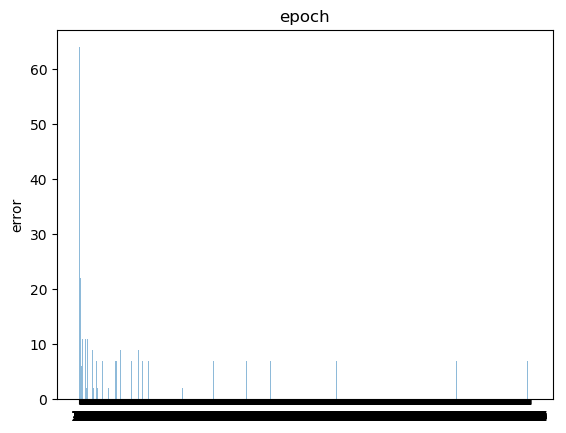

0 [-1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1]


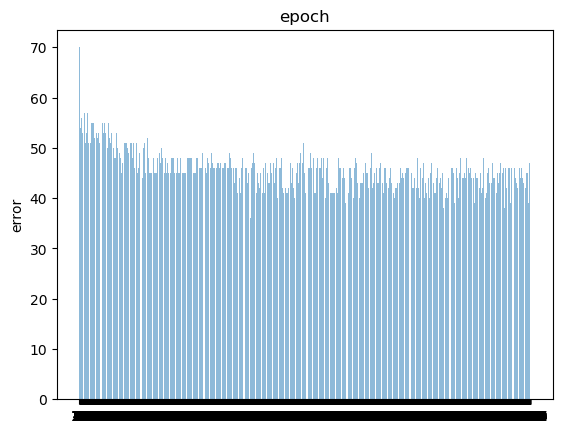

1 [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1]


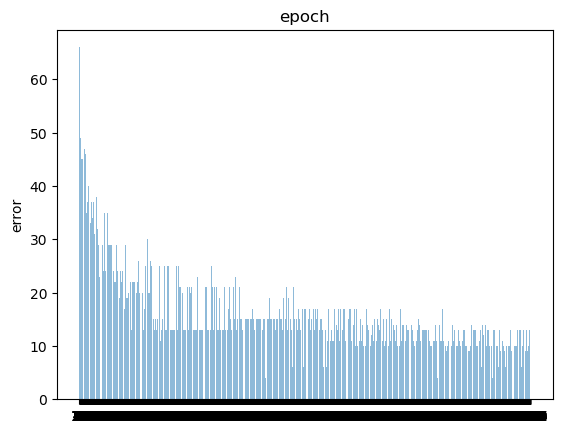

2 [-1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1]


In [43]:

weights=[]

for l in labels:
    
    y=one_all(X_train,y_train,l)
    
    w=svm_sgd_plot(X_train,y)
    
    weights.append(w)
    
    print(l,y)
    

In [44]:
weights

[array([ 0.39644996,  1.70629208, -2.32576559, -1.08112891]),
 array([  8.98427296, -30.74694159,  10.44182313, -57.28519533]),
 array([-47.31441509, -43.25002384,  64.43837245,  51.40051474])]

In [45]:


for i,w in enumerate(weights):
    print(i,w)




0 [ 0.39644996  1.70629208 -2.32576559 -1.08112891]
1 [  8.98427296 -30.74694159  10.44182313 -57.28519533]
2 [-47.31441509 -43.25002384  64.43837245  51.40051474]


In [48]:
def predict_multi_2(X,Y,w):
    
    predict = []
    
    for i, x in enumerate(X):  
    
        temp = (Y[i]*np.dot(X[i], w)) 
        
        predict.append(temp)
        

    return predict

In [49]:
def predict_multi_1(X,Y,W):
    
    all_predicted = []
    
    
    for i,w in enumerate(W):
            
        y=one_all(X_test,y_test,i)

        p=predict_multi_2(X_test,y,W[i])

        all_predicted.append(p)
  
    return all_predicted

In [50]:
all_predicted=predict_multi_1(X_test,y_test,weights)

In [51]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [54]:
print(all_predicted[0][0],all_predicted[1][0],all_predicted[2][0])

5.032490359296828 -50.95303706295413 45.17703059861566


In [59]:
c = len(weights)

r = len(all_predicted[0])

In [64]:
def max(a,b,c):
    
    
    max_i=0
    
    if(a>b and a>c):
        max_i=0
    
    if(b>a and b>c):
        max_i=1
    
    if(c>a and c>b):
        max_i=2
        
    return max_i
    

In [65]:

l_predict=[]

for i in range(0,r):
    t=max(all_predicted[0][i],all_predicted[1][i],all_predicted[2][i])
    l_predict.append(t)
    

In [66]:
l_predict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1]

In [67]:
status=check_correctnes(y_test,l_predict)

In [68]:
status

2.0